In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
data = pd.read_csv("../preprocessed_data/Linux_disk_LE.csv")
data

,PID,RDDSK,WRDSK,WCANCL,DSK,CMD_encoded,label
0,3197,148.2,37340.0,12328.0,0.22,285,0
1,2327,32824.0,688.0,4.0,0.04,364,0
2,2797,23468.0,7416.0,6152.0,0.04,526,0
3,2801,3612.0,14320.0,0.0,0.02,576,0
4,2993,5184.0,11152.0,0.0,0.02,609,0
...,...,...,...,...,...,...,...
939847,1279,0.0,0.0,0.0,0.00,524,0
939848,3024,0.0,0.0,0.0,0.00,237,0
939849,1414,0.0,0.0,0.0,0.00,596,0
939850,2918,0.0,0.0,0.0,0.00,233,0


In [ ]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')

In [2]:
X = data[['PID', 'RDDSK', 'WRDSK', 'WCANCL', 'DSK', 'CMD_encoded']].values
y = data['label'].values

In [3]:
window_size = 30
X_windows = []
y_windows = []

for i in range(len(X) - window_size + 1):
    X_windows.append(X[i:i + window_size])
    y_windows.append(y[i + window_size - 1])  # ラベルはウィンドウの最後のデータに対応させます

X_windows = np.array(X_windows)
y_windows = np.array(y_windows)


# トレーニングデータとテストデータに分割
X_train, X_temp, y_train, y_temp = train_test_split(X_windows, y_windows, test_size=0.3, random_state=42, stratify=y_windows)
# テストデータをさらに検証データとテストデータに分割
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# LSTMモデルの構築
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))

# モデルのコンパイル
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# モデルの概要
model.summary()

2024-10-28 15:37:39.223928: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-28 15:37:39.247588: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-28 15:37:39.646178: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-10-28 15:37:39.938760: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/t

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,451 (44.73 KB)

 Trainable params: 11,451 (44.73 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# モデルの訓練
# モデルの訓練
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1, shuffle=False)


Epoch 1/10


2024-10-28 15:37:42.067421: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8900


10280/10280 ━━━━━━━━━━━━━━━━━━━━ 77s 7ms/step - accuracy: 0.8299 - loss: 0.4532 - val_accuracy: 0.8329 - val_loss: 0.4487
Epoch 2/10
10280/10280 ━━━━━━━━━━━━━━━━━━━━ 53s 5ms/step - accuracy: 0.8343 - loss: 0.4476 - val_accuracy: 0.8349 - val_loss: 0.4467
Epoch 3/10
10280/10280 ━━━━━━━━━━━━━━━━━━━━ 58s 6ms/step - accuracy: 0.8344 - loss: 0.4469 - val_accuracy: 0.8345 - val_loss: 0.4472
Epoch 4/10
10280/10280 ━━━━━━━━━━━━━━━━━━━━ 70s 7ms/step - accuracy: 0.8349 - loss: 0.4465 - val_accuracy: 0.8347 - val_loss: 0.4473
Epoch 5/10
10280/10280 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - accuracy: 0.8347 - loss: 0.4468 - val_accuracy: 0.8329 - val_loss: 0.4481
Epoch 6/10
10280/10280 ━━━━━━━━━━━━━━━━━━━━ 63s 6ms/step - accuracy: 0.8342 - loss: 0.4468 - val_accuracy: 0.8341 - val_loss: 0.4474
Epoch 7/10
10280/10280 ━━━━━━━━━━━━━━━━━━━━ 69s 7ms/step - accuracy: 0.8349 - loss: 0.4464 - val_accuracy: 0.8349 - val_loss: 0.4470
Epoch 8/10
10280/10280 ━━━━━━━━━━━━━━━━━━━━ 50s 5ms/step - accuracy: 0.8346 - lo

In [6]:
# モデルの評価
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy:.4f}')

4406/4406 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8338 - loss: 0.4469
Test Accuracy: 0.8336


4406/4406 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


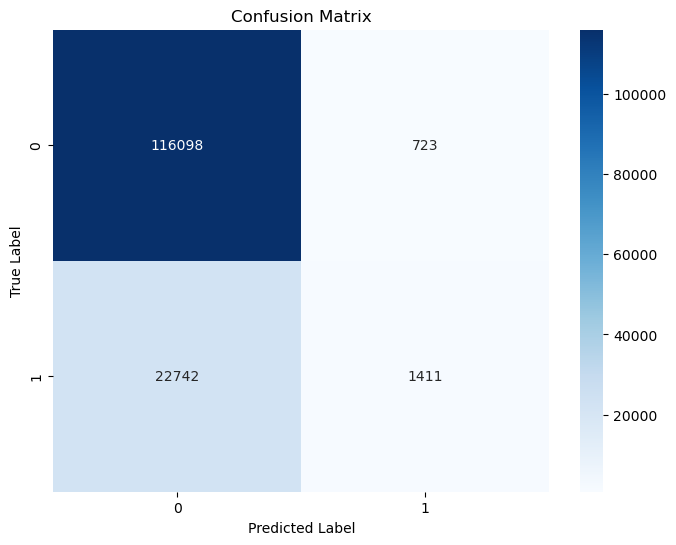

              precision    recall  f1-score   support

           0       0.84      0.99      0.91    116821
           1       0.66      0.06      0.11     24153

    accuracy                           0.83    140974
   macro avg       0.75      0.53      0.51    140974
weighted avg       0.81      0.83      0.77    140974



In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 予測の実行
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # 閾値0.5でクラスに変換

# 混同行列の計算
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# 混同行列の表示
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 精度、適合率、再現率、F1スコアのレポート
print(classification_report(y_test, y_pred_classes))


In [ ]:
import tensorflow as tf

# TensorFlowのバージョンを確認
print("TensorFlow version:", tf.__version__)

# 利用可能なGPUリストを表示
print("Available GPU devices:", tf.config.list_physical_devices('GPU'))
